In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('feature_time_final.csv')

In [4]:
df

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
0,0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187,B007
1,1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862,B007
2,2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454,B007
3,3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001,B007
4,4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655,B007
...,...,...,...,...,...,...,...,...,...,...,...
4546,4546,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954,Normal
4547,4547,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398,Normal
4548,4548,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799,Normal
4549,4549,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855,Normal


In [5]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [6]:
df

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187,B007
1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862,B007
2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454,B007
3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001,B007
4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655,B007
...,...,...,...,...,...,...,...,...,...,...
4546,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954,Normal
4547,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398,Normal
4548,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799,Normal
4549,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855,Normal


## EDA

In [7]:
#import dtale
#import dtale.app as dtale_app

In [8]:
#dtale.show(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Max           4551 non-null   float64
 1   Min           4551 non-null   float64
 2   Mean          4551 non-null   float64
 3   Stddev        4551 non-null   float64
 4   RMS           4551 non-null   float64
 5   skew          4551 non-null   float64
 6   kurtosis      4551 non-null   float64
 7   crest_factor  4551 non-null   float64
 8   form_factor   4551 non-null   float64
 9   fault         4551 non-null   object 
dtypes: float64(9), object(1)
memory usage: 355.7+ KB


In [10]:
df.describe()

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
count,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,1.357051,-1.322275,0.015716,0.335255,0.335889,-0.031143,1.789016,3.675163,27.262739
std,1.424776,1.431902,0.006791,0.312703,0.312162,0.219257,2.861864,0.874151,66.032070
min,0.148951,-6.292552,-0.004709,0.055824,0.057844,-1.983150,-0.964485,2.174432,-2818.352752
25%,0.409825,-1.596221,0.011049,0.133329,0.134280,-0.112246,-0.113093,2.971912,7.445924
50%,0.656095,-0.618545,0.014056,0.187897,0.189052,0.002526,0.517664,3.442705,12.688381
75%,1.692079,-0.377281,0.018898,0.489344,0.489281,0.077533,3.333071,4.254010,33.603130
max,6.825904,-0.137060,0.038996,1.370537,1.369988,1.242747,31.749747,8.825055,2027.845467


In [11]:
df.corr()

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
Max,1.000000,-0.991623,-0.149353,0.972177,0.972208,0.034137,0.645779,0.599139,0.416099
Min,-0.991623,1.000000,0.155607,-0.967367,-0.967395,0.051754,-0.660302,-0.571547,-0.415025
Mean,-0.149353,0.155607,1.000000,-0.190911,-0.189095,0.005907,0.039843,0.179676,-0.206472
Stddev,0.972177,-0.967367,-0.190911,1.000000,0.999998,0.056762,0.496020,0.449238,0.455273
RMS,0.972208,-0.967395,-0.189095,0.999998,1.000000,0.056753,0.495946,0.449399,0.455166
skew,0.034137,0.051754,0.005907,0.056762,0.056753,1.000000,-0.230075,0.090706,0.049643
kurtosis,0.645779,-0.660302,0.039843,0.496020,0.495946,-0.230075,1.000000,0.866348,0.146543
crest_factor,0.599139,-0.571547,0.179676,0.449238,0.449399,0.090706,0.866348,1.000000,0.123504
form_factor,0.416099,-0.415025,-0.206472,0.455273,0.455166,0.049643,0.146543,0.123504,1.000000


### Splitting

In [12]:
X=df.iloc[:,0:-1]

In [13]:
Y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 750, random_state = 0,stratify = df['fault'])

In [15]:
X_train

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
51,0.401793,-0.411390,0.019694,0.131634,0.133035,-0.046259,0.016446,3.020197,6.754990
2764,4.650763,-4.884469,0.015095,1.249425,1.248906,0.062732,2.122157,3.723869,82.736875
2562,1.989148,-1.772814,0.012530,0.548641,0.548516,0.066397,0.713315,3.626418,43.775624
3830,2.826181,-2.620853,0.017529,0.483440,0.483522,-0.206455,10.817465,5.844996,27.584382
3058,4.582320,-4.699173,0.009375,1.034755,1.034292,0.016527,4.229595,4.430392,110.320654
...,...,...,...,...,...,...,...,...,...
1939,0.482319,-0.411807,0.030126,0.149742,0.152671,-0.038005,0.001229,3.159202,5.067755
2267,2.444972,-1.963071,0.007826,0.619264,0.619011,0.116798,0.626531,3.949804,79.099516
3727,4.135773,-5.002992,0.011875,0.878792,0.878443,-0.738260,7.918749,4.708074,73.972543
3385,0.415770,-0.408260,0.009501,0.153483,0.153702,0.037286,-0.468946,2.705041,16.177529


In [16]:
y_train

51       B007
2764    OR007
2562    IR021
3830    OR021
3058    OR007
        ...  
1939    IR014
2267    IR021
3727    OR021
3385    OR014
3673    OR021
Name: fault, Length: 3801, dtype: object

### Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-0.66992855,  0.63534808,  0.58569077, ..., -0.61287513,
        -0.74777689, -0.41314992],
       [ 2.31734064, -2.49301074, -0.09266856, ...,  0.11957464,
         0.05917414,  1.07409302],
       [ 0.44607267, -0.31679742, -0.47093346, ..., -0.37047641,
        -0.05257995,  0.31147908],
       ...,
       [ 1.95527361, -2.57590249, -0.567524  , ...,  2.13585888,
         1.18783309,  0.90254305],
       [-0.66010175,  0.63753658, -0.91769868, ..., -0.78171361,
        -1.10919002, -0.22871641],
       [ 2.28213153, -2.11240917, -0.01007977, ...,  1.9646631 ,
         1.77833887,  0.55597633]])

In [19]:
X_test

array([[-0.70146229,  0.6452693 ,  0.46421173, ..., -0.43271979,
        -0.76851763, -0.42204427],
       [-0.79973024,  0.78679261, -1.25202894, ..., -0.66264912,
        -0.55425219, -0.36110768],
       [-0.11596132, -0.00617563,  0.51853627, ...,  0.8038796 ,
         0.48855429, -0.25002144],
       ...,
       [-0.63076804,  0.61477613,  0.24655303, ..., -0.53155008,
        -0.51501507, -0.38565282],
       [-0.5926342 ,  0.67299036, -0.50506658, ..., -0.49202624,
        -0.02856846, -0.32207568],
       [-0.38011143,  0.47514953, -0.63363665, ...,  0.20328797,
         0.64390537, -0.21602771]])

In [20]:
y_train

51       B007
2764    OR007
2562    IR021
3830    OR021
3058    OR007
        ...  
1939    IR014
2267    IR021
3727    OR021
3385    OR014
3673    OR021
Name: fault, Length: 3801, dtype: object

In [21]:
y_test

242       B007
4131    Normal
1802     IR007
678       B014
277       B007
         ...  
28        B007
2333     IR021
257       B007
839       B014
819       B014
Name: fault, Length: 750, dtype: object

### Converting all the arrays to data frame

In [22]:
X_train = pd.DataFrame(X_train)

In [23]:
X_train.columns =['Max','Min','Mean','Stddev','RMS','skew','kurtosis','crest_factor','form_factor']


In [24]:
X_train

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
0,-0.669929,0.635348,0.585691,-0.650262,-0.648927,-0.078971,-0.612875,-0.747777,-0.413150
1,2.317341,-2.493011,-0.092669,2.923242,2.924599,0.420544,0.119575,0.059174,1.074093
2,0.446073,-0.316797,-0.470933,0.682881,0.681631,0.437343,-0.370476,-0.052580,0.311479
3,1.034555,-0.909895,0.266298,0.474438,0.473489,-0.813167,3.144147,2.491623,-0.005443
4,2.269222,-2.363419,-0.936228,2.236957,2.237308,0.208782,0.852625,0.869394,1.614008
...,...,...,...,...,...,...,...,...,...
3796,-0.613314,0.635056,2.124205,-0.592370,-0.586044,-0.041143,-0.618168,-0.588370,-0.446175
3797,0.766544,-0.449859,-1.164773,0.908659,0.907389,0.668336,-0.400663,0.318269,1.002897
3798,1.955274,-2.575902,-0.567524,1.738351,1.738206,-3.250486,2.135859,1.187833,0.902543
3799,-0.660102,0.637537,-0.917699,-0.580411,-0.582743,0.303922,-0.781714,-1.109190,-0.228716


In [25]:
X_test = pd.DataFrame(X_test)

In [26]:
X_test.columns =['Max','Min','Mean','Stddev','RMS','skew','kurtosis','crest_factor','form_factor']


In [27]:
X_test

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
0,-0.701462,0.645269,0.464212,-0.695617,-0.694206,-0.129876,-0.432720,-0.768518,-0.422044
1,-0.799730,0.786793,-1.252029,-0.854501,-0.856879,-0.516155,-0.662649,-0.554252,-0.361108
2,-0.115961,-0.006176,0.518536,-0.144606,-0.145295,-2.316450,0.803880,0.488554,-0.250021
3,-0.648808,0.685975,-0.590189,-0.702830,-0.704349,0.910312,-0.404981,0.067822,-0.352115
4,-0.566967,0.606752,0.322151,-0.567928,-0.567931,0.522943,-0.589686,-0.240315,-0.372312
...,...,...,...,...,...,...,...,...,...
745,-0.657755,0.654899,0.112334,-0.616224,-0.616492,-0.308619,-0.649238,-0.854105,-0.375382
746,0.189403,-0.236406,-0.645655,0.520427,0.518931,0.237459,-0.472358,-0.469247,0.313299
747,-0.630768,0.614776,0.246553,-0.620517,-0.620413,-0.031046,-0.531550,-0.515015,-0.385653
748,-0.592634,0.672990,-0.505067,-0.624057,-0.625654,1.275958,-0.492026,-0.028568,-0.322076


In [28]:
y_test

242       B007
4131    Normal
1802     IR007
678       B014
277       B007
         ...  
28        B007
2333     IR021
257       B007
839       B014
819       B014
Name: fault, Length: 750, dtype: object

# SVM

In [29]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [30]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)

In [31]:
tuned_svm_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [32]:
tuned_svm_clf.best_score_

0.9087111479486116

In [33]:
tuned_svm_clf.best_params_

{'C': 500, 'gamma': 0.05, 'kernel': 'rbf'}

In [34]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=500, gamma=0.05)

In [35]:
train_predictions = best_clf.predict(X_train)
test_predictions = best_clf.predict(X_test)

In [36]:
train_confu_matrix = confusion_matrix(y_train, train_predictions)
test_confu_matrix = confusion_matrix(y_test, test_predictions)

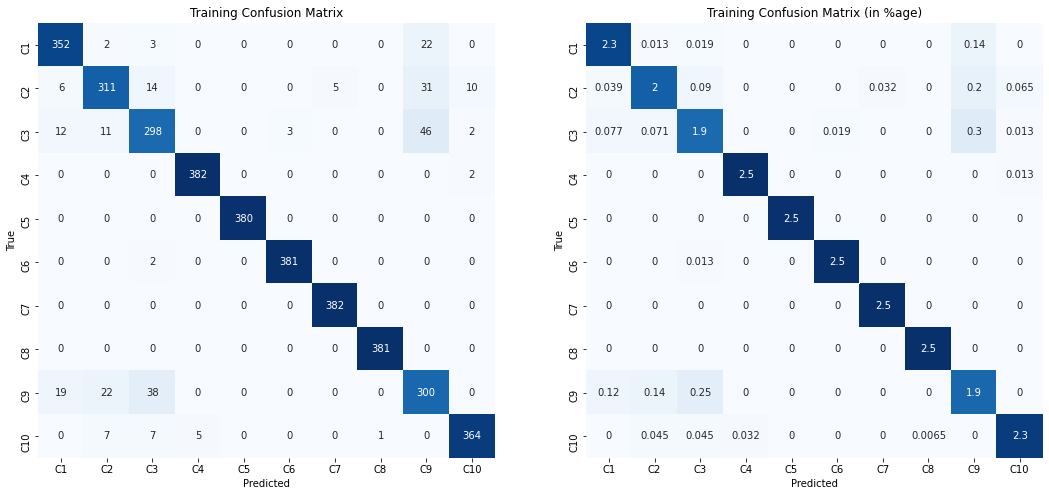

In [37]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

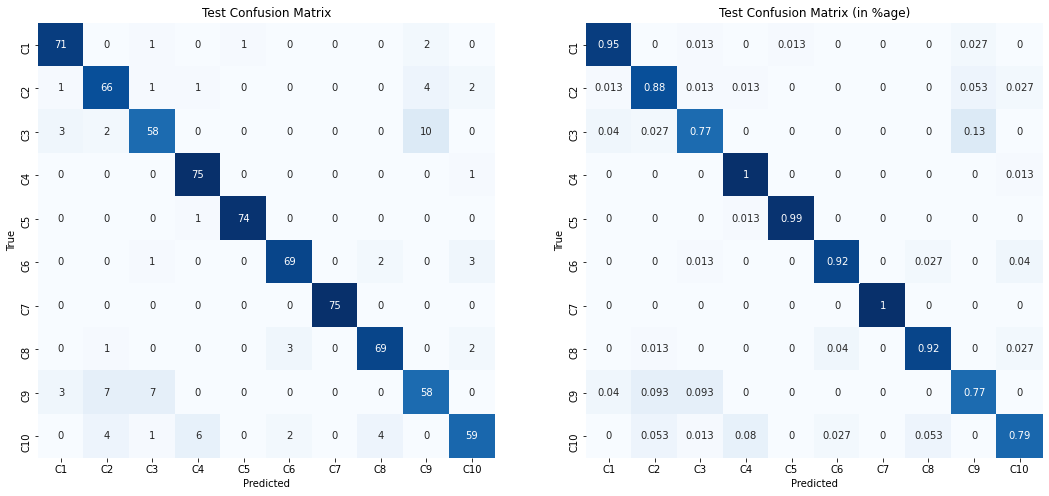

In [38]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
overall_test_accuracy = accuracy_score(y_test, test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.8986666666666666


In [40]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,test_predictions, multi_class="ovr")


In [ ]:
y_pred_proba = best_clf.predict_proba(X_test)

In [ ]:
y_pred_proba


In [ ]:

roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

In [42]:
from sklearn import metrics



# Print the confusion matrix
print(metrics.confusion_matrix(y_test, test_predictions))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, test_predictions, digits=3))

[[71  0  1  0  1  0  0  0  2  0]
 [ 1 66  1  1  0  0  0  0  4  2]
 [ 3  2 58  0  0  0  0  0 10  0]
 [ 0  0  0 75  0  0  0  0  0  1]
 [ 0  0  0  1 74  0  0  0  0  0]
 [ 0  0  1  0  0 69  0  2  0  3]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  1  0  0  0  3  0 69  0  2]
 [ 3  7  7  0  0  0  0  0 58  0]
 [ 0  4  1  6  0  2  0  4  0 59]]
              precision    recall  f1-score   support

        B007      0.910     0.947     0.928        75
        B014      0.825     0.880     0.852        75
        B021      0.841     0.795     0.817        73
       IR007      0.904     0.987     0.943        76
       IR014      0.987     0.987     0.987        75
       IR021      0.932     0.920     0.926        75
      Normal      1.000     1.000     1.000        75
       OR007      0.920     0.920     0.920        75
       OR014      0.784     0.773     0.779        75
       OR021      0.881     0.776     0.825        76

    accuracy                          0.899       750
   macro avg      0